In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, metrics
from sklearn import svm, tree, linear_model, neighbors, ensemble

/home/pranav/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
df = pd.read_csv('churn_data.csv')
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,27000.0,35422.702519,20321.006678,1.0,17810.5,35749.00,53244.25,69658.0
churn,27000.0,0.413852,0.492532,0.0,0.0,0.00,1.00,1.0
age,26996.0,32.219921,9.964838,17.0,25.0,30.00,37.00,91.0
credit_score,18969.0,542.944225,61.059315,2.0,507.0,542.00,578.00,838.0
deposits,27000.0,3.341556,9.131406,0.0,0.0,0.00,1.00,65.0
withdrawal,27000.0,0.307000,1.055416,0.0,0.0,0.00,0.00,29.0
purchases_partners,27000.0,28.062519,42.219686,0.0,0.0,9.00,43.00,1067.0
purchases,27000.0,3.273481,8.953077,0.0,0.0,0.00,1.00,63.0
cc_taken,27000.0,0.073778,0.437299,0.0,0.0,0.00,0.00,29.0
cc_recommended,27000.0,92.625778,88.869343,0.0,10.0,65.00,164.00,522.0


In [6]:
## null values
df.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

Only 3 atributes are having null values:-
age,
credit_score,
rewards_earned

In [7]:
df.dropna(subset=['age'], inplace=True)
df[df.age.isna()]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred


In [8]:
## dropping credit_score and rewards_earned
df = df.drop(columns=['credit_score', 'rewards_earned'],axis=1)

Histogram of the Numerical Columns


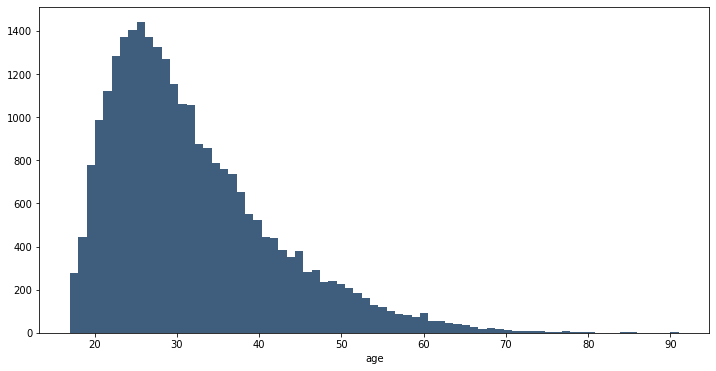

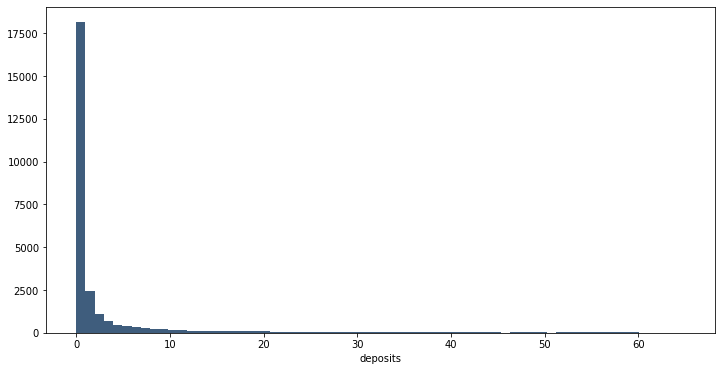

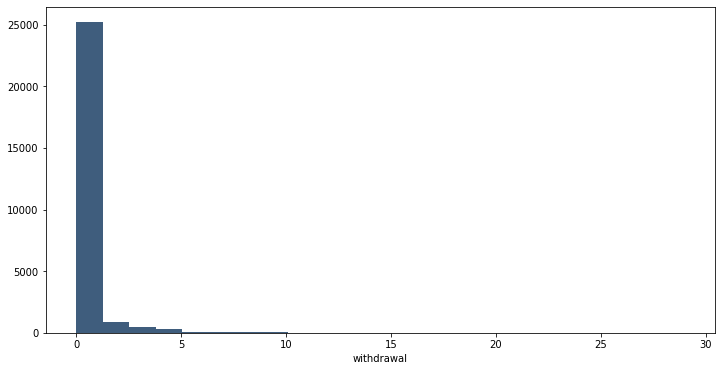

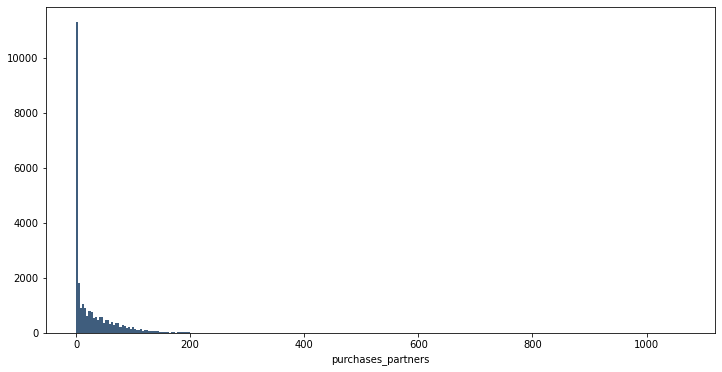

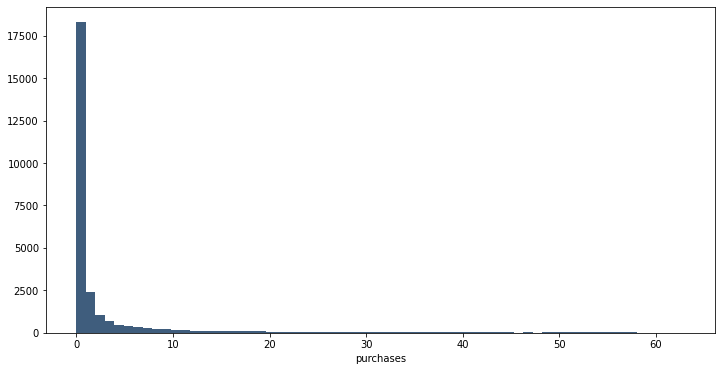

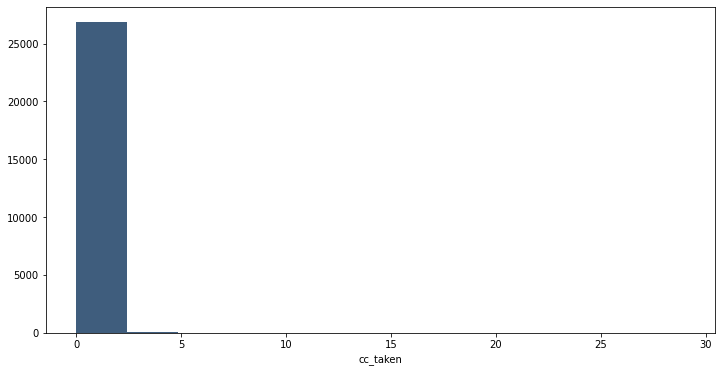

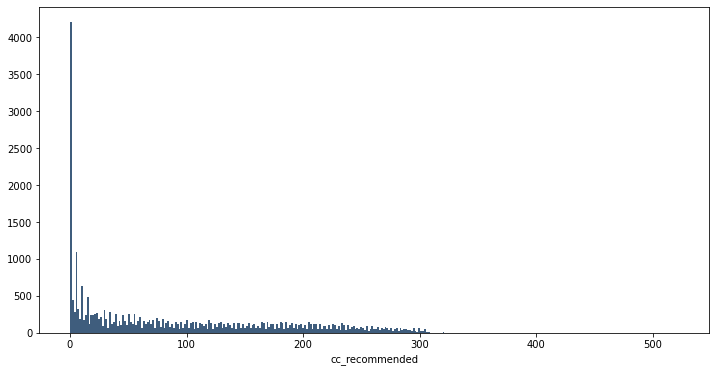

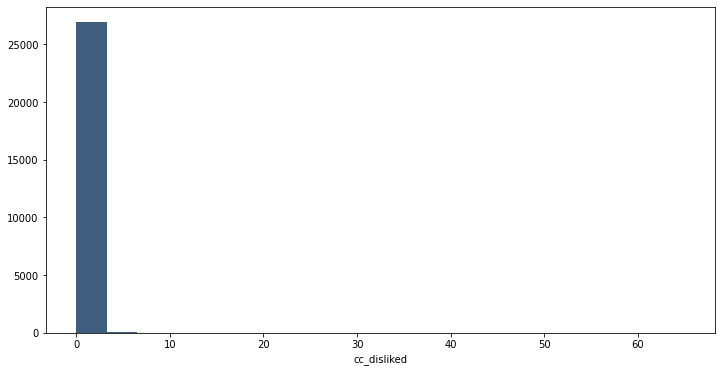

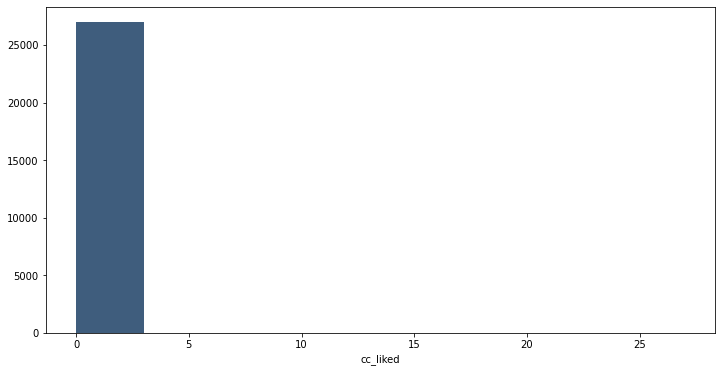

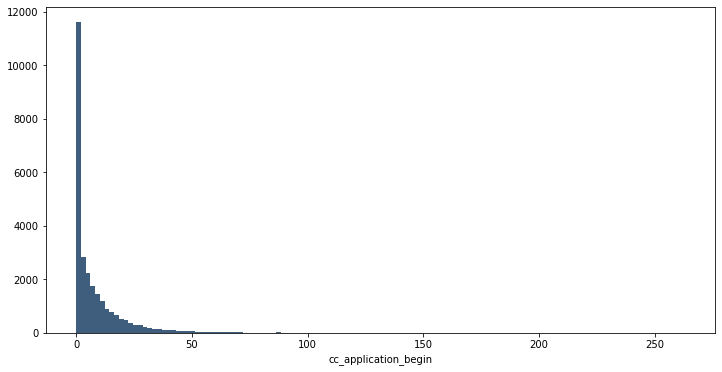

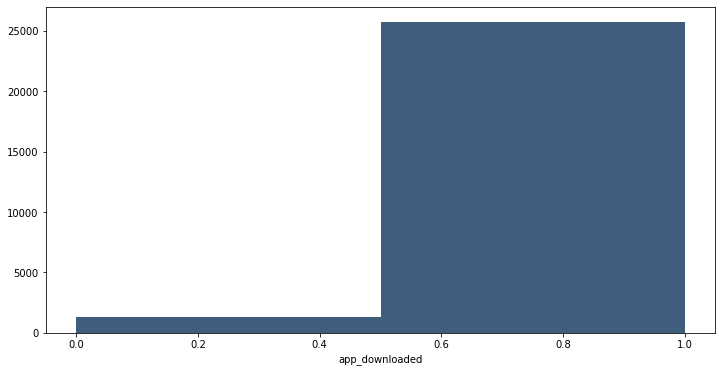

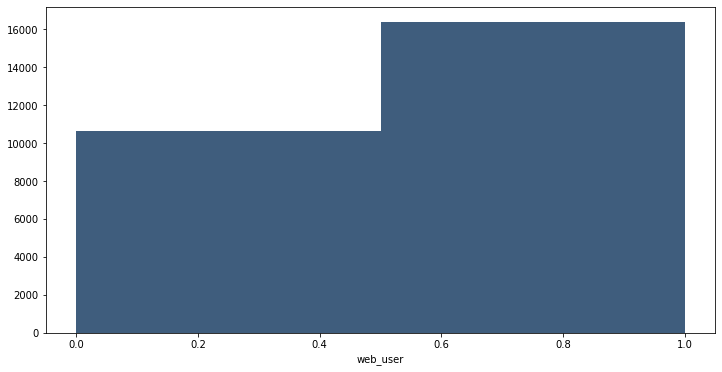

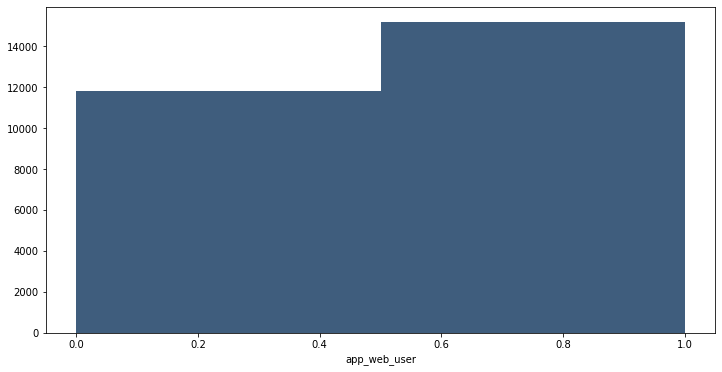

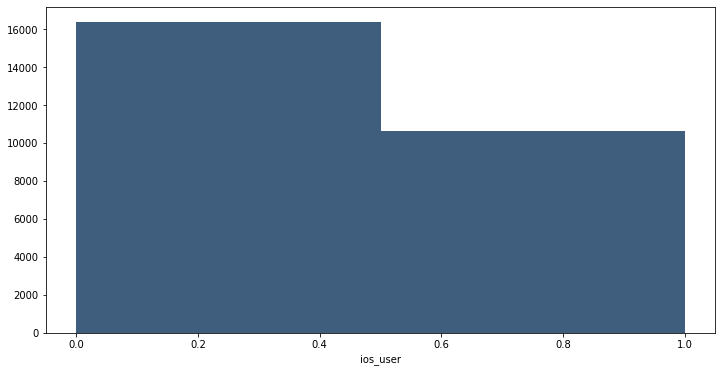

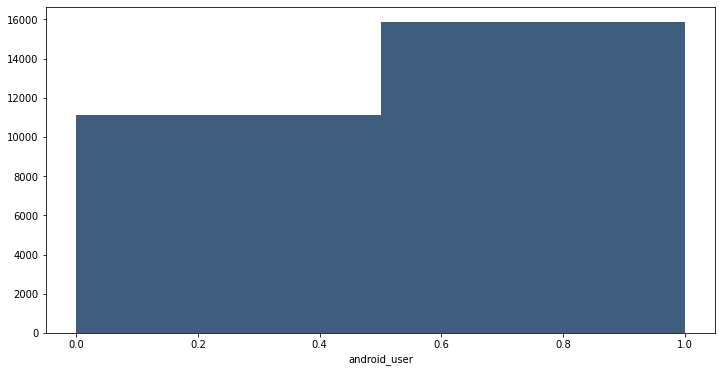

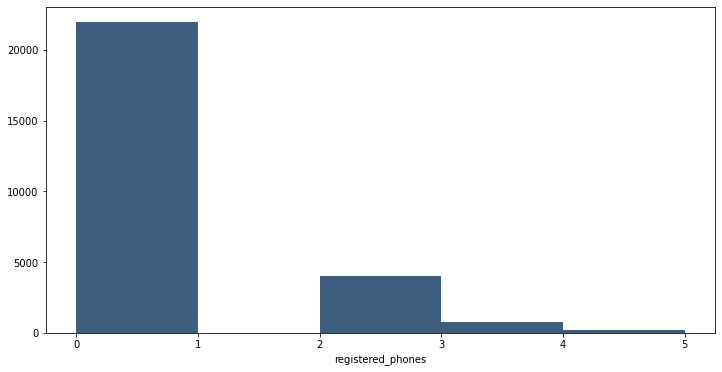

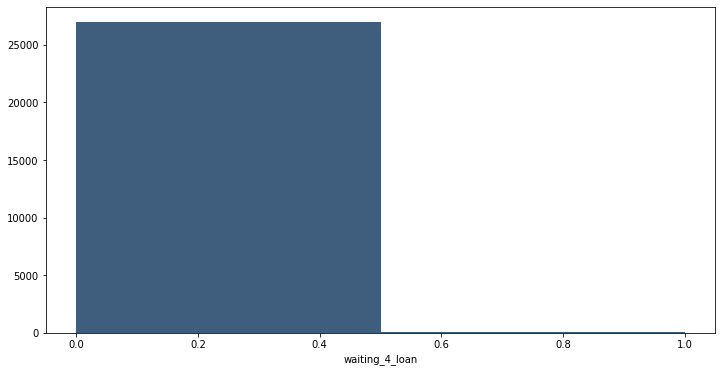

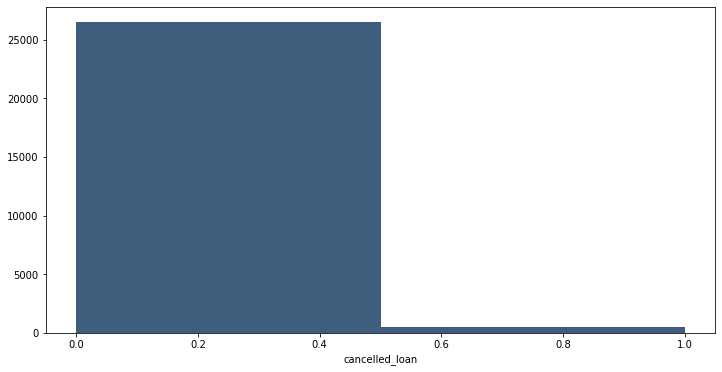

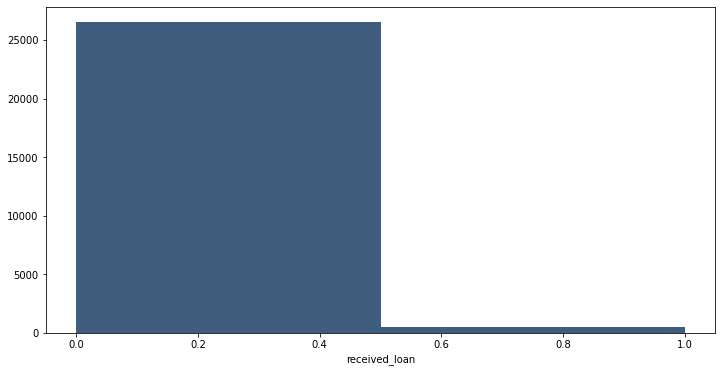

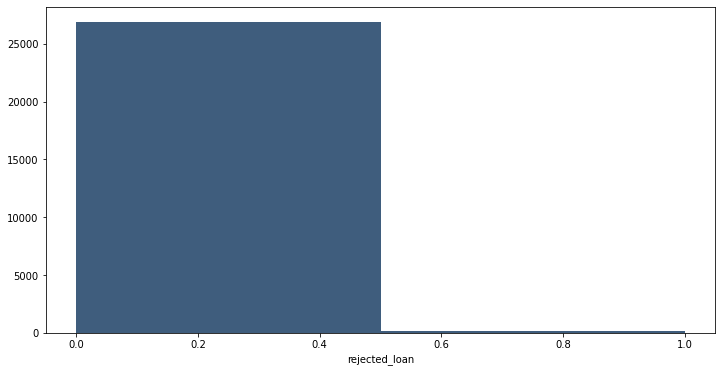

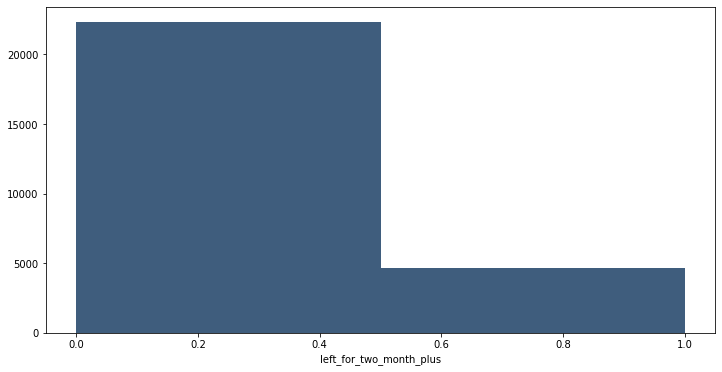

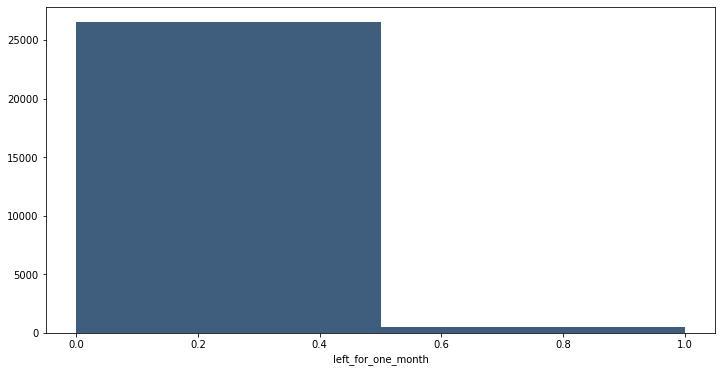

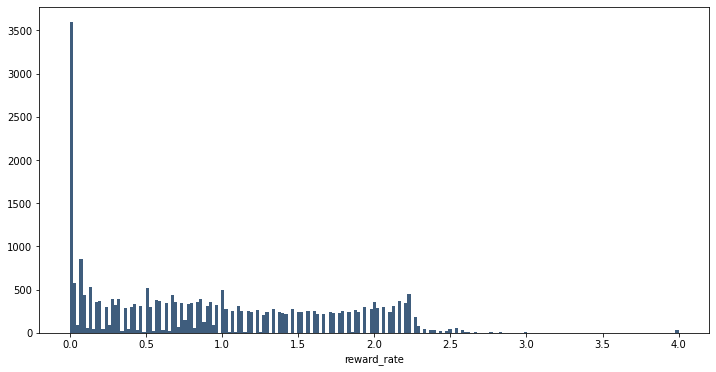

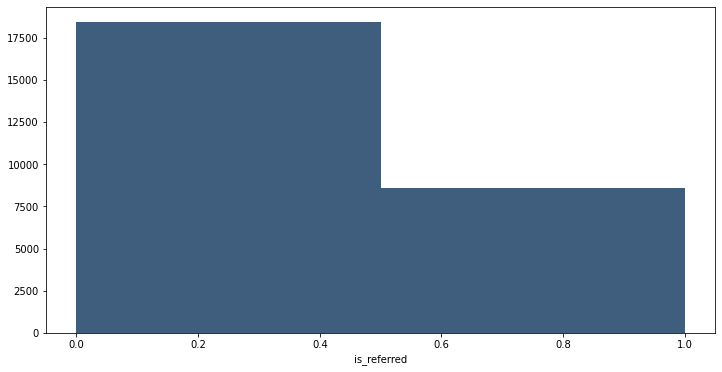

In [9]:
## Plotting histogram
df2 = df.drop(columns=['user','churn'])

print('Histogram of the Numerical Columns')
for column in df2.columns:
    if df2[column].dtype in (['int64', 'float64']):
        plt.figure(figsize=(12,6))
        vals = df2[column].nunique()
        #print("value of the vals",vals)
        #plt.title(column,fontsize=15)
        plt.hist(df2[column], bins=vals, color='#3F5D7D')
        plt.xlabel(column)
        plt.show()

        

In [10]:
## corelation matrix for the dependent variable
churn_corr = df.corr()['churn']
#print(churn_corr)
del churn_corr['user']
del churn_corr['churn']
churn_corr.sort_values()

purchases_partners        -0.260784
cc_recommended            -0.198570
reward_rate               -0.167193
purchases                 -0.135921
deposits                  -0.135381
cc_application_begin      -0.118590
is_referred               -0.083241
withdrawal                -0.068543
age                       -0.063206
app_downloaded            -0.055647
android_user              -0.036626
waiting_4_loan            -0.013558
left_for_two_month_plus    0.005094
cc_disliked                0.009423
cc_liked                   0.010886
app_web_user               0.011092
ios_user                   0.017026
registered_phones          0.028578
web_user                   0.035053
cancelled_loan             0.035275
left_for_one_month         0.036134
received_loan              0.049960
rejected_loan              0.056457
cc_taken                   0.058383
Name: churn, dtype: float64

<AxesSubplot:>

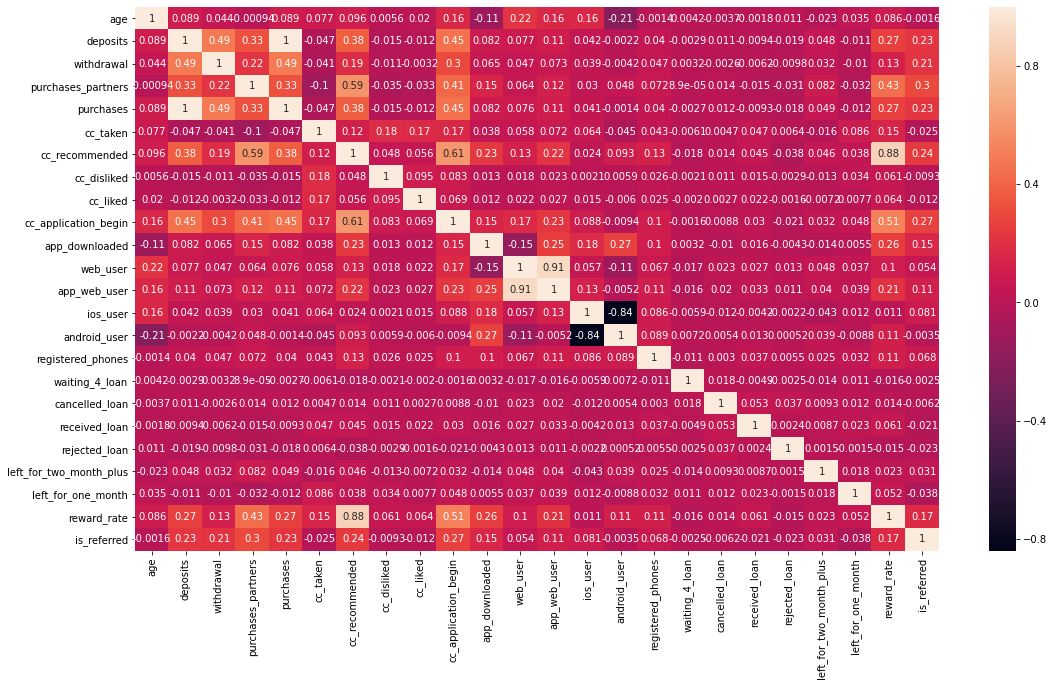

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(df2.corr(),annot=True)

#### As from above the corealtion matrix, below pairs are very much corelated
    adroid_user and ios_user
    reward_rate and cc_recommended
    web_user and app_web_user
    purchases and deposits

#### When 2 idependent variables are highly corelated then choose to drop that attribute which has low corelation with the dependent variable

In [12]:
## Dropping variales from the DataFrame
df2 = df2.drop(columns=['ios_user', 'reward_rate', 'app_web_user', 'deposits'])

In [13]:
df2['churn'] = df['churn'].copy()

In [14]:
#### Categorical values
### one hot encoding
df2 = pd.get_dummies(df2)
df2.columns

Index(['age', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'is_referred', 'churn',
       'housing_O', 'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [15]:
## dropping the category_attribute_na 
df2 = df2.drop(columns=['zodiac_sign_na', 'payment_type_na', 'housing_na'], axis=1)

<AxesSubplot:>

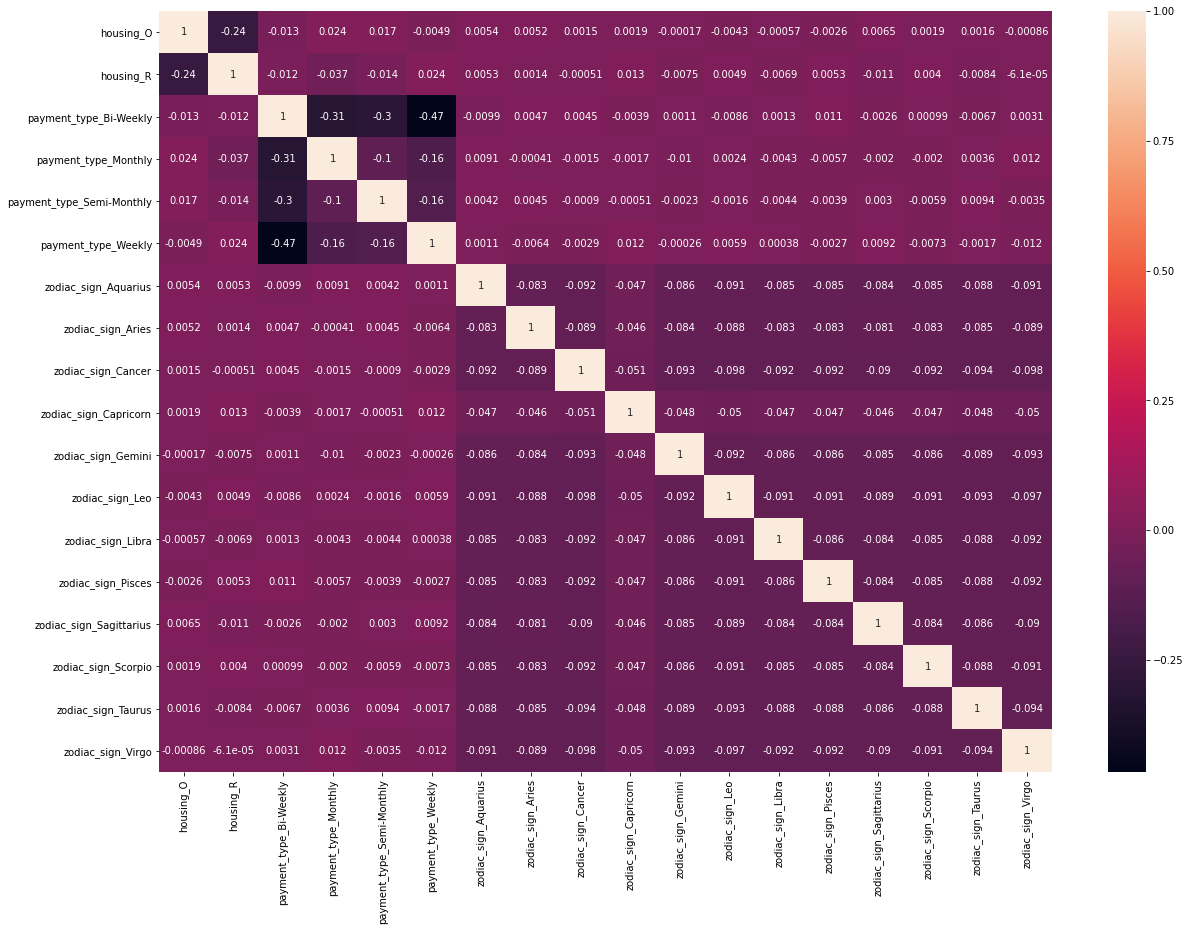

In [16]:
plt.figure(figsize=(20,14))
sns.heatmap(df2[['housing_O', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo']].corr(),annot=True)

In [17]:
x = df2.drop(columns='churn', axis=1)
y = df2['churn']

In [18]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
## Feature Scaling

scaler = preprocessing.StandardScaler()

x_train2 = pd.DataFrame(scaler.fit_transform(x_train))
x_test2 = pd.DataFrame(scaler.fit_transform(x_test))

x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values
x_train = x_train2
x_test = x_test2


In [20]:
#### Model Building ####


# Fitting Model to the Training Set
classifier = linear_model.LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test)

# Evaluating Results

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print(metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print(metrics.f1_score(y_test, y_pred))

[[2404  762]
 [1135 1099]]
0.6487037037037037
0.5905427189682966
0.4919427036705461
0.5367521367521367


In [21]:
#### Model Building ####


# Fitting Model to the Training Set
classifier = svm.SVC()
classifier.fit(x_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test)

# Evaluating Results

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print(metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print(metrics.f1_score(y_test, y_pred))

[[2473  693]
 [1156 1078]]
0.6575925925925926
0.6086956521739131
0.4825425246195166
0.5383270911360799


In [22]:
#### Model Building ####


# Fitting Model to the Training Set
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test)

# Evaluating Results

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print(metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print(metrics.f1_score(y_test, y_pred))

[[2067 1099]
 [1044 1190]]
0.6031481481481481
0.5198776758409785
0.5326768128916741
0.5261994251602918


In [23]:
#### Model Building ####


# Fitting Model to the Training Set
classifier = ensemble.RandomForestClassifier()
classifier.fit(x_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test)

# Evaluating Results

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print(metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print(metrics.f1_score(y_test, y_pred))

[[2539  627]
 [1195 1039]]
0.6625925925925926
0.6236494597839136
0.4650850492390331
0.5328205128205128
